# CLASSIFY BREAST CANCERS

#### Classifying breast cancers into bening or malignant. ####

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### DATA

Dataset is cleaned already, ready to analyse. 

We will classify cancer into the malignant or benign.

'Class' attributes is 2 for bening, and 4 for malignant.

In [37]:
df = pd.read_csv('DATA/breast_cancer.csv')
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


### EXPLORATARY DATA ANALYSIS AND VISUALIZATION

Converting 'Class' values: 2-->0 , 4-->1

1 --> Malignant

0 --> Bening

<AxesSubplot: xlabel='Class', ylabel='count'>

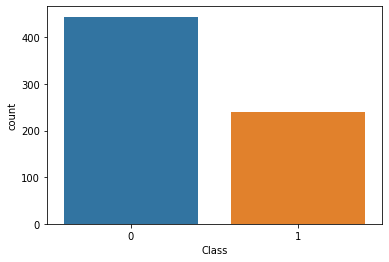

In [38]:
df['Class'] = df['Class'].apply(lambda x: 0 if x == 2 else 1)
sns.countplot(data=df, x='Class')

#### Seeking for correlations between features. 

At the bottom, we can see relation between features and 'Class'. There are high correlation between 'Class' and features.

<AxesSubplot: >

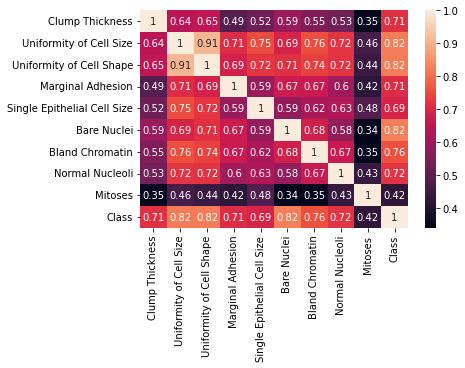

In [39]:
sns.heatmap(df.corr(),annot=True)

### PREPARING THE DATA

#### Train Test Split and Normalization

In [40]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### MODEL TRAINING

In [41]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

### PERFORMANCE EVALUATION

In [42]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

#### TRAIN DATA ####

In [43]:
train_y_hat = log_model.predict(scaled_X_train)
print(classification_report(y_train, train_y_hat))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       397
           1       0.95      0.96      0.96       217

    accuracy                           0.97       614
   macro avg       0.97      0.97      0.97       614
weighted avg       0.97      0.97      0.97       614



#### TEST DATA ####

In [44]:
test_y_hat = log_model.predict(scaled_X_test)
print(classification_report(y_test, test_y_hat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.95      0.98        22

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

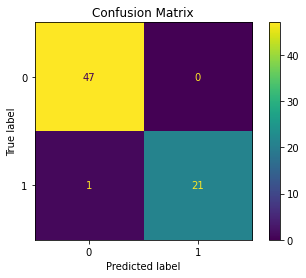

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, test_y_hat)
plt.title("Confusion Matrix")

### ROC Curve

Text(0.5, 1.0, 'ROC Curve')

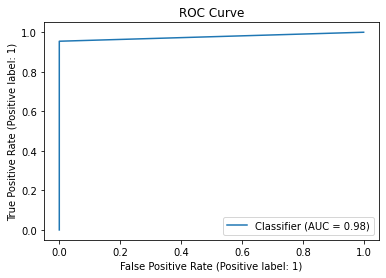

In [46]:
RocCurveDisplay.from_predictions(y_test, test_y_hat)
plt.title("ROC Curve")